# Kriging Example 1
Author: Mohit S. Chauhan Date: Aug 20, 2018

In this example, Kriging is used to generate a surrogate model for a given data. In this data, sample points are generated using STS class and functional value at sample points are given by function defined below.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the STS and Krig class from UQpy.

In [1]:
from UQpy.Surrogates import Krig
from UQpy.SampleMethods import STS
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


Using UQpy STS class to generate samples for two random variables, which are uniformly distributed between 0 and 1.

In [2]:
x = STS(dimension=2, dist_name=['Uniform', 'Uniform'], dist_params=[[0, 1], [0, 1]], sts_design=[4, 4])


UQpy: Performing STS design...
Done!


Define the function and it is used to evaluate values at sample points.

In [3]:
def y_func(z):
    return 1/(6.2727*(abs(0.3-z[:, 0]**2-z[:, 1]**2)+0.01))

Y = y_func(x.samples)

Using UQpy Krig class to generate a surrogate for generated data. In this illustration, Quadratic regression model and Exponential correlation model are used. 

In [4]:
%%capture
K = Krig(samples=x.samples, values=Y, reg_model='Quadratic', corr_model='Exponential')

This plot shows the input data as red dot and green wirefram plot represent the kriging surrogate generated through Krig class.


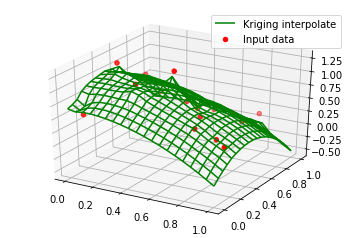

In [5]:
num = 20
x1 = np.linspace(0, 1, num)
x2 = np.linspace(0, 1, num)
x1v, x2v = np.meshgrid(x1, x2)
y = np.zeros([num, num])
for i in range(num):
    for j in range(num):
        y[i, j] = K.interpolate(np.array([x1v[i, j], x2v[i, j]]))

fig = plt.figure()
ax = plt.axes(projection='3d')
# Plot for estimated values
kr = ax.plot_wireframe(x1v, x2v, y, color='Green', label='Kriging interpolate')

# Plot for scattered data
ID = ax.scatter3D(x.samples[:, 0], x.samples[:, 1], y_func(x.samples), color='Red', label='Input data')
plt.legend(handles=[kr, ID])
plt.show()
